In [1]:
#Luyao Wang, Di Jin, Yingqi Lin

[0.02533085 0.02856594 0.02856594 0.02856594 0.02533085 0.02533085]
0.007232792142628147
equation : np.sum(alphas[i]*y[i]*(np.dot(x[i],x.T) + 1)**2+b,axis=0)
equation :0.028565939974777663X1^2 + 0.028565940033567456X2^2 + 0.028565940067674767X1 + 0.025330848302697224X2 + 0.02533084824893922X1X2 + 0.032563640460811505
kernel function:  k[i, j] = (np.dot(xi.T,xj) + 1)**2
support vectors:
 [[ -8.47422847   5.15621613]
 [-10.260969     2.07391791]
 [  1.3393313  -10.29098822]
 [  9.67917724   4.3759541 ]
 [ -6.80002274  -7.02384335]
 [  9.90143538  -0.31483149]]


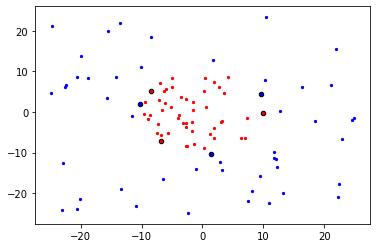

In [12]:
import numpy as np
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt

def loadDataSet(filename):
    fr = open(filename)
    data = []
    label = []
    for line in fr.readlines():
        lineAttr = line.strip().split(',')
        data.append([float(x) for x in lineAttr[:-1]])
        label.append(float(lineAttr[-1]))
    return data,label

def kernel(x):
    m, n = x.shape
    k = np.zeros((m, m))
    for i, xi in enumerate(x):
        for j, xj in enumerate(x):
            k[i, j] = (np.dot(xi.T,xj) + 1)**2             
    return k


def fit(x, y):
    row = x.shape[0]
    k = kernel(x)
    P = matrix(np.outer(y, y)*k)
    q = matrix(-np.ones((row, 1)))
    G = matrix(-np.eye(row))
    h = matrix(np.zeros(row))
    A = matrix(y.reshape(1, -1))
    b = matrix(np.zeros(1))
    solvers.options['show_progress'] = False
    solver = solvers.qp(P, q, G, h, A, b)
    alphas = np.array(solver['x'])
    return alphas

def plot_data(x, y, ax):
    Color = ['red', 'blue']
    unique = np.unique(y)
    for li in range(len(unique)):
        x_sub = x[y == unique[li]]
        ax.scatter(x_sub[:, 0], x_sub[:, 1],s=5, c = Color[li])

def predict(alphas,y,x,b):
    m, n = x.shape
    ayk=[]
    pre=[]
    for i in range(len(x)):
        k= (np.dot(x[i],x.T) + 1)**2
        X=alphas[i]*y[i]*k+b
        ayk.append(list(X))
    ayk=np.array(ayk)
    wxb=np.sum(ayk,axis=0)
    for i in X:
        if i>=0:
            pre.append(1)
        else:
            pre.append(-1)          
    return pre


    
X, Y = loadDataSet('nonlinsep.txt')
x=np.array(X)
y=np.array(Y)
# fit svm classifier
alphas = fit(x, y)
# get weights
w = np.sum(alphas * y[:, None] * kernel(x), axis = 0)
b = y - alphas*y*kernel(x)
p=predict(alphas,y,x,b[0])

# get bias
cond = (alphas > 1e-5).reshape(-1)
b = y[cond] - alphas[cond]*y[cond]*kernel(x[cond])
bias = b[0]
norm = np.linalg.norm(w)
w, bias = w / norm, bias / norm
print(w[cond])
print(np.sum(bias))
print('equation : np.sum(alphas[i]*y[i]*(np.dot(x[i],x.T) + 1)**2+b,axis=0)') 

# show data and w
fig, ax = plt.subplots()
ax.scatter(x[cond][:, 0], x[cond][:, 1], s=20,c ='black')
plot_data(x, y, ax)
print('kernel function: ',"k[i, j] = (np.dot(xi.T,xj) + 1)**2")
print('support vectors:\n',x[cond])
plt.show()